In [27]:
import yfinance as yf
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

# Step 1: Download stock data from Yahoo Finance
ticker = "AAPL"  # Apple Inc. as example
data = yf.download(ticker, start="2020-01-01", end="2025-11-26")

# Step 2: Compute daily returns from the adjusted closing price
data["Returns"] = data["Close"].pct_change().dropna()

# Prepare the returns array for HMM (reshape to 2D as required)
returns = data["Returns"].dropna().values.reshape(-1, 1)


/var/folders/f_/1bh6mfq97bxdwzwnr49jf8nm0000gn/T/ipykernel_42081/54082009.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-11-26")
[*********************100%***********************]  1 of 1 completed


Model is not converging.  Current: 3866.3928433401975 is not greater than 3866.3931753950133. Delta is -0.0003320548157716985


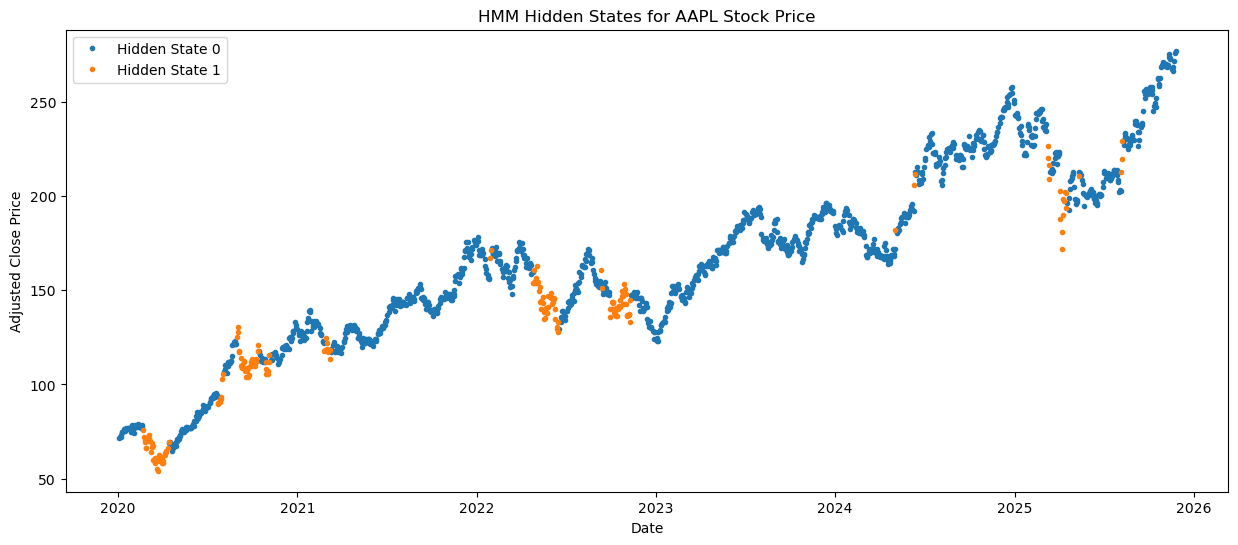

In [28]:

# Step 3: Fit a Gaussian HMM model with 2 hidden states
model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
model.fit(returns)

# Step 4: Predict hidden states for each observation
hidden_states = model.predict(returns)

# Optional: Plot the closing prices colored by hidden state
plt.figure(figsize=(15, 6))
for i in range(model.n_components):
    state = (hidden_states == i)
    plt.plot(data.index[1:][state], data["Close"][1:][state], ".", label=f"Hidden State {i}")
plt.legend()
plt.title(f"HMM Hidden States for {ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()
